In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# load dataset
mnist = tf.keras.datasets.fashion_mnist

In [3]:
# split dataset into train and test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# display the clothes image of train and test data
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

In [5]:
# normalize the image pixel values 
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# define the model layers
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
# compile and fit the dataset to model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4982 - accuracy: 0.8247
Epoch 2/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3757 - accuracy: 0.8646
Epoch 3/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3377 - accuracy: 0.8764
Epoch 4/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3126 - accuracy: 0.8845
Epoch 5/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2946 - accuracy: 0.8917
Epoch 6/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2819 - accuracy: 0.8972
Epoch 7/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2689 - accuracy: 0.9007
Epoch 8/20
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2555 - accuracy: 0.9044
Epoch 9/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2479 - accuracy: 0.9073
Epoch 

In [8]:
# evaluate the model with test data
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3576870234847069, 0.8834]

In [9]:
# predict the classes
classifications = model.predict(test_images)
# predicted class
print(classifications[0])

[3.2698150e-10 2.5313199e-13 4.3865571e-11 4.0278706e-16 5.2232979e-13 5.2777381e-05 2.6615116e-10 5.2278268e-04 6.1676142e-10 9.9942446e-01]


In [10]:
# actual class of test data first image
print(test_labels[0])

9


In [11]:
# call back function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
# call the callback function when reach the required accuracy
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 288us/sample - loss: 0.4717
Epoch 2/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3600
Epoch 3/5
60000/60000 [==============================] - 16s 271us/sample - loss: 0.3225
Epoch 4/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.2984
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 17s 278us/sample - loss: 0.2983


In [13]:
print(model.predict_classes(test_images))

[9 2 1 ... 8 1 5]


In [14]:
print(test_labels)

[9 2 1 ... 8 1 5]


#### With this we can classify the clothes of different classes from 0 to 9. Similar model can be used for multi class classification problem of computer vision.

### Improving the Fashion classifier with convolutions

Above in fashion recognition using a Deep Neural Network (DNN) containing three layers:

-- the input layer (in the shape of the data), 

-- the output layer (in the shape of the desired output) and 

-- a hidden layer. 

We experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy.

In [15]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [16]:
convd_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
convd_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convd_model.fit(training_images, training_labels, epochs=5)

test_loss = convd_model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.4213 - accuracy: 0.8467
Epoch 2/5
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.2780 - accuracy: 0.8986
Epoch 3/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.2308 - accuracy: 0.9142
Epoch 4/5
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.1972 - accuracy: 0.9259
Epoch 5/5
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.1693 - accuracy: 0.9362
10000/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================

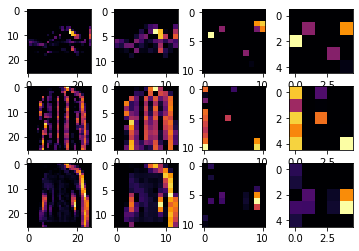

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=9
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in convd_model.layers]
activation_model = tf.keras.models.Model(inputs = convd_model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)